# Machine Learning Mock 3
## Unsupervised Learning
## Project: Consumer Segmentation

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("customers.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
#excluding the channel and region features from data
data = df.copy()
data.drop(['Channel'],axis=1,inplace=True)
data.drop(['Region'],axis=1,inplace=True)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# Select three indices of your choice you wish to sample from the dataset
sam = data.sample(n=3, random_state=49)


# Create a DataFrame of the chosen samples
pd.DataFrame(sam)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
239,47493,2567,3779,5243,828,2253
105,15587,1014,3970,910,139,1378
181,112151,29627,18148,16745,4948,8550


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


##### sample1-He was spending 47493rs for fresh(veg) and for others he is spending less just for home needs he could be a vegitables retailer.
##### sample2-He was spending avg amounts on everything just like needs for home he could be a normal customer
##### sample3-He was spending 112151 on fresh,29627 on milk, 18148 on grocery,16745 on frozen, 4948 on Detergents_paper and 8550 on Delicatessen so he was spending more than a avg spending onthe category so he could be a owner of supermarket store  

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
new_data = data.copy()
new_data=pd.DataFrame(new_data)
x = new_data.drop(['Grocery'],axis=1)
y = new_data['Grocery']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 1)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,r2_score

In [7]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
r2_score(pred,y_test)

0.8328456539620349

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

#### predict feature - Grocery
#### Priction score - 0.84
#### yes this feature is necessary identifying customers spending habits

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [8]:
# Produce a scatter matrix for each pair of features in the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data,kind="reg")

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

In [9]:
corr = data.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [10]:
corr_new = corr[(corr > 0.5)|(corr < -0.5)].style.background_gradient(cmap='twilight_r')
corr_new

C:\Users\Krishna Vamshi\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1,nan,nan,nan,nan,nan
Milk,nan,1,0.728335,nan,0.661816,nan
Grocery,nan,0.728335,1,nan,0.924641,nan
Frozen,nan,nan,nan,1,nan,nan
Detergents_Paper,nan,0.661816,0.924641,nan,1,nan
Delicatessen,nan,nan,nan,nan,nan,1


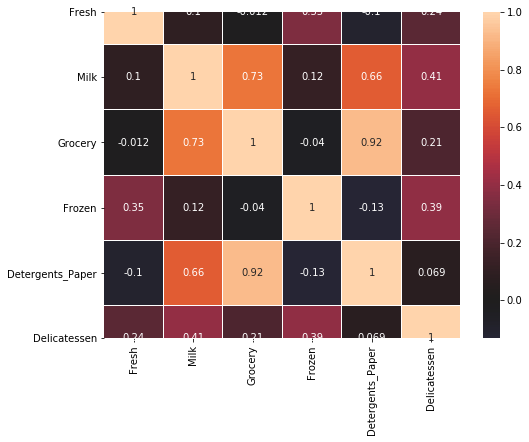

In [11]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,center=0,annot=True,linewidths=0.1)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [12]:
log_data1 = data.copy()
log_data1 = np.log(log_data1)
log_data1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [13]:
log_sample2 = log_data1.copy()
log_sample2 = np.log(log_sample2)
log_sample2 = log_sample2.sample(n=140,random_state=1)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
log_sample2.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
283,2.318148,2.103194,2.029119,2.223562,1.749094,1.978617
369,2.167232,1.761315,1.875870,1.944912,1.311994,1.738773
207,2.059279,2.135723,2.164958,2.077966,2.149256,1.566007
300,2.272946,2.167820,2.169943,1.904220,2.065195,2.028595
429,2.203906,2.010543,2.102073,1.348111,1.488584,2.057253


In [15]:
log_sample2.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.056166,-0.151250,0.325758,0.021906,0.229445
Milk,0.056166,1.000000,0.796398,-0.067330,0.712525,0.187866
Grocery,-0.151250,0.796398,1.000000,-0.148297,0.722777,0.156305
Frozen,0.325758,-0.067330,-0.148297,1.000000,-0.152195,0.206658
Detergents_Paper,0.021906,0.712525,0.722777,-0.152195,1.000000,0.029931
Delicatessen,0.229445,0.187866,0.156305,0.206658,0.029931,1.000000


#### After being applied natural logarithm i can see correlation is still present.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
log_sample2.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2.103629,2.092142,2.131343,1.988605,1.887136,1.887861
std,0.336036,0.141207,0.137671,0.181043,0.325450,0.274499
min,0.094048,1.551491,1.687726,1.276345,0.094048,0.094048
25%,2.069544,2.007736,2.039061,1.905075,1.719307,1.835249
50%,2.193444,2.110517,2.147521,2.007471,1.925957,1.928745
75%,2.268015,2.180821,2.233218,2.102306,2.119620,2.036395
max,2.410646,2.388903,2.436940,2.399392,2.362466,2.273415


In [17]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit  = q1-1.5*iqr
    upper_limit= q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < lower_limit)|(df_in[col_name] > upper_limit)]
    return df_out

In [18]:
remove_outlier(log_sample2,'Fresh')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
412,1.520544,2.102923,2.243414,1.522783,2.078981,1.417583
174,1.732715,1.959633,2.147599,2.057966,1.615507,1.984277
65,1.491251,2.297605,2.373291,1.276345,2.312079,1.982452
338,0.094048,1.759261,2.181170,2.267485,0.996229,1.842123
218,1.061385,2.188654,2.264819,1.968302,2.137209,2.170158
171,1.667389,2.318511,2.291953,1.868490,2.206012,2.167949
81,1.684373,2.215201,2.259176,1.730849,2.193237,1.619360
353,1.560704,2.168205,2.298768,1.691819,2.204863,1.947768
95,0.094048,2.076856,2.167985,1.806118,1.687726,1.881578
66,0.787195,1.992744,2.187346,1.641864,2.098182,1.192660


In [19]:
remove_outlier(log_sample2,'Milk')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
122,2.241791,1.668330,1.704977,2.027673,1.169032,1.910569
98,1.827865,1.551491,1.895628,1.916455,1.392612,1.585719


In [20]:
remove_outlier(log_sample2,'Grocery')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
122,2.241791,1.668330,1.704977,2.027673,1.169032,1.910569
275,1.875195,1.999314,1.687726,1.910913,1.518276,1.781294
161,2.243704,1.839211,1.730849,1.945305,0.094048,2.042661


In [21]:
remove_outlier(log_sample2,'Frozen')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
429,2.203906,2.010543,2.102073,1.348111,1.488584,2.057253
412,1.520544,2.102923,2.243414,1.522783,2.078981,1.417583
418,1.870608,2.202446,2.285652,1.587264,2.176547,1.895241
65,1.491251,2.297605,2.373291,1.276345,2.312079,1.982452
379,2.116976,2.145869,2.224482,1.582588,1.902217,1.646230
106,1.985416,2.169529,2.227686,1.587264,2.178051,2.016584
325,2.341387,2.275027,2.253367,2.399392,1.966881,2.155491
128,1.597698,2.206937,2.110067,1.600564,1.941315,0.094048


In [22]:
remove_outlier(log_sample2,'Detergents_Paper')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
338,0.094048,1.759261,2.181170,2.267485,0.996229,1.842123
204,2.025336,1.915796,2.147264,1.978517,0.475885,1.972890
161,2.243704,1.839211,1.730849,1.945305,0.094048,2.042661


In [23]:
remove_outlier(log_sample2,'Delicatessen')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
412,1.520544,2.102923,2.243414,1.522783,2.078981,1.417583
375,2.160175,1.985037,1.954147,1.855034,1.818956,1.446565
66,0.787195,1.992744,2.187346,1.641864,2.098182,1.192660
128,1.597698,2.206937,2.110067,1.600564,1.941315,0.094048
187,2.053987,2.195829,2.218342,2.168296,2.097863,0.094048


In [24]:
def replaceoutliers(df, col, method = 'quantile', strategy = 'median'):
    col_data = df[col]
    q1, q2_median, q3 = col_data.quantile([.25, 0.5, 0.75])
    col_mean, col_std = col_data.mean(), col_data.std()
    ## If data is normally distributed method = std and strategy = mean
    ## If data is not normally distributed  method = quantile and strategy = median
    ## Setting outliars boundry using quantile method
    if method == 'quantile':
        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
        
        ## Setting outliars boundries using std method
    elif method =='stddev':
        cutoff = col_std * 2
        lower_limit = col_mean - cutoff
        upper_limit = col_mean + cutoff
    else:
        print('error:please pass the correct method of strategy as a quantile for quantile and stddev for standard deviation')
    
    ## print outliars 
    outliers = df.loc[(col_data < lower_limit)|(col_data > upper_limit),col]
    outlier_density = round(len(outliers)/len(df)*100, 2)
    if len(outliers) == 0:
        print(f'features\'{col}\'does not have any outlier')
    else:
        print(f"total number of outliers are:{len(outliers)}\n")
        print(f"outliers % density:{outlier_density}%\n")
        print(f'outliers for \'{col}\'are :\n{np.sort(np.array(outliers))}\n')
        display(df[(col_data < lower_limit)|(col_data > upper_limit)])
        
    ## Replace outliers with median or mean strategies
    if outlier_density > 2:
        if strategy == 'median':
            df.loc[(col_data < lower_limit)|(col_data > upper_limit),col] = q2_median
        else:
            df.loc[(col_data < lower_limit)|(col_data > upper_limit),col] = col_mean
    elif len(outliers!=0):
        df = df[(col_data > lower_limit)&(col_data < upper_limit)]
    return df
    

In [25]:
for col in list(log_sample2.columns):
    good_data = replaceoutliers(log_sample2,col)

total number of outliers are:12

outliers % density:8.57%

outliers for 'Fresh'are :
[0.09404783 0.09404783 0.78719501 1.06138513 1.49125133 1.52054352
 1.56070427 1.59769775 1.66738929 1.68437315 1.70348574 1.73271548]



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
412,1.520544,2.102923,2.243414,1.522783,2.078981,1.417583
174,1.732715,1.959633,2.147599,2.057966,1.615507,1.984277
65,1.491251,2.297605,2.373291,1.276345,2.312079,1.982452
338,0.094048,1.759261,2.181170,2.267485,0.996229,1.842123
218,1.061385,2.188654,2.264819,1.968302,2.137209,2.170158
171,1.667389,2.318511,2.291953,1.868490,2.206012,2.167949
81,1.684373,2.215201,2.259176,1.730849,2.193237,1.619360
353,1.560704,2.168205,2.298768,1.691819,2.204863,1.947768
95,0.094048,2.076856,2.167985,1.806118,1.687726,1.881578
66,0.787195,1.992744,2.187346,1.641864,2.098182,1.192660


total number of outliers are:2

outliers % density:1.43%

outliers for 'Milk'are :
[1.55149071 1.66833019]



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
122,2.241791,1.668330,1.704977,2.027673,1.169032,1.910569
98,1.827865,1.551491,1.895628,1.916455,1.392612,1.585719


total number of outliers are:3

outliers % density:2.14%

outliers for 'Grocery'are :
[1.68772618 1.70497683 1.73084936]



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
122,2.241791,1.668330,1.704977,2.027673,1.169032,1.910569
275,1.875195,1.999314,1.687726,1.910913,1.518276,1.781294
161,2.243704,1.839211,1.730849,1.945305,0.094048,2.042661


total number of outliers are:8

outliers % density:5.71%

outliers for 'Frozen'are :
[1.27634526 1.34811149 1.52278301 1.58258754 1.5872637  1.5872637
 1.60056407 2.39939227]



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
429,2.203906,2.010543,2.102073,1.348111,1.488584,2.057253
412,2.193444,2.102923,2.243414,1.522783,2.078981,1.417583
418,1.870608,2.202446,2.285652,1.587264,2.176547,1.895241
65,2.193444,2.297605,2.373291,1.276345,2.312079,1.982452
379,2.116976,2.145869,2.224482,1.582588,1.902217,1.646230
106,1.985416,2.169529,2.227686,1.587264,2.178051,2.016584
325,2.341387,2.275027,2.253367,2.399392,1.966881,2.155491
128,2.193444,2.206937,2.110067,1.600564,1.941315,0.094048


total number of outliers are:3

outliers % density:2.14%

outliers for 'Detergents_Paper'are :
[0.09404783 0.475885   0.99622889]



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
338,2.193444,1.759261,2.181170,2.267485,0.996229,1.842123
204,2.025336,1.915796,2.147264,1.978517,0.475885,1.972890
161,2.243704,1.839211,2.147521,1.945305,0.094048,2.042661


total number of outliers are:5

outliers % density:3.57%

outliers for 'Delicatessen'are :
[0.09404783 0.09404783 1.19266012 1.41758331 1.44656486]



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
412,2.193444,2.102923,2.243414,2.007471,2.078981,1.417583
375,2.160175,1.985037,1.954147,1.855034,1.818956,1.446565
66,2.193444,1.992744,2.187346,1.641864,2.098182,1.192660
128,2.193444,2.206937,2.110067,2.007471,1.941315,0.094048
187,2.053987,2.195829,2.218342,2.168296,2.097863,0.094048


In [26]:
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
283,2.318148,2.103194,2.029119,2.223562,1.749094,1.978617
369,2.167232,1.761315,1.875870,1.944912,1.311994,1.738773
207,2.059279,2.135723,2.164958,2.077966,2.149256,1.566007
300,2.272946,2.167820,2.169943,1.904220,2.065195,2.028595
429,2.203906,2.010543,2.102073,2.007471,1.488584,2.057253


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

#### yes i can see outliers for more than one feature in sample data
#### yes we should remove outlier data from dataset replace them with other data points.
#### yes if any data points were added to the outliers list to be removed because if we didnt remove outliers list it might cause data imbalance to data.
####  clusters are sensitive with outliers,some times clustor doesnt give good results if data present with outliers.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_samples = pca.fit_transform(good_data)
pca_samples = pd.DataFrame(pca_samples, columns=['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6'])
pca_samples.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.182862,-0.244982,0.091520,-0.000339,-0.021110,-0.065390
1,0.752730,0.119843,-0.064317,-0.023053,0.006247,0.011900
2,-0.143214,0.280054,0.319545,0.017081,-0.066838,-0.023902
3,-0.186343,-0.033906,-0.097250,-0.103379,0.028749,-0.036317
4,0.370235,-0.151583,-0.193911,0.058701,-0.063214,0.065534


In [28]:
pca.explained_variance_ratio_

array([0.58168401, 0.18524397, 0.09488815, 0.06919188, 0.04424102,
       0.02475097])

In [29]:
pca_results = np.cumsum(pca.explained_variance_ratio_)
pca_results

array([0.58168401, 0.76692798, 0.86181613, 0.93100801, 0.97524903,
       1.        ])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

#### pc1-0.57 and in pc2-0.77
#### pc1-1.41,pc2- -2.11, pc3- 0.50  pc4-0.27 pc5- -0.92 and pc6- -0.50
#### customers spending represents in 1st customer is he was spending more money in 1st 3rd and 4th features and ans spending less in 2nd,5th and 6th as pca value is in negative.
#### 2nd customer- he was spending more in 1st ,2nd,3rd and 6th feature and spending less 5th and 4th features as pca value in -ve.
#### 3rd customer- he was spending less in every feature because every feature is in -ve.
#### 4th customer- he was spending more in 1st ,4th,5th and 6th feature and less in 2nd and 3rd feature.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [30]:
# Display sample log-data after having a PCA transformation applied
log_data1.head(6)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [31]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(good_data)
pca_samples = pca.fit_transform(log_sample2)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [32]:
reduced_data

array([[ 1.82861584e-01, -2.44982065e-01],
       [ 7.52729581e-01,  1.19842789e-01],
       [-1.43214263e-01,  2.80053682e-01],
       [-1.86343323e-01, -3.39062730e-02],
       [ 3.70234521e-01, -1.51583385e-01],
       [ 3.70902225e-02, -4.77062846e-03],
       [-5.59127214e-01, -3.34590034e-01],
       [ 3.21232625e-01,  1.59771733e-02],
       [ 1.92150236e-01,  9.54090402e-03],
       [-1.48756627e-01, -2.45912596e-01],
       [ 2.66425630e-01, -8.28008001e-02],
       [-1.54151882e-01, -2.01022731e-01],
       [-2.86432636e-01, -1.16476958e-01],
       [ 1.51019515e-01, -1.28769087e-01],
       [-4.17875526e-01, -4.58621875e-02],
       [-3.54805827e-01, -2.28957174e-02],
       [ 7.83298040e-01, -8.87743959e-02],
       [ 9.97908370e-02,  1.45617955e-01],
       [-1.73461822e-01,  2.05140360e-02],
       [ 2.52290836e-01, -2.44825131e-01],
       [-3.42525393e-01, -4.63469663e-02],
       [-1.44128366e-01,  2.51622422e-02],
       [-1.63089125e-01, -1.20748260e-01],
       [-3.

#### After perfomimg in 2 dimensions the values remain unchanged with 6 dimensions values

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusterer = KMeans(n_clusters=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score=silhouette_score(reduced_data,preds)
print(score)

0.477033811750359


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

##### I have tried clusters numbers from 2 to 6
##### when i took 2 clusters it gave best silhouette score i.,e 0.46

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [34]:
clusterer = KMeans(n_clusters=2).fit(reduced_data)
centers = clusterer.cluster_centers_
print(centers)

[[-0.26140517  0.00503133]
 [ 0.23991981 -0.00461779]]


In [37]:
reduced_data=pd.DataFrame(reduced_data)
reduced_data=reduced_data.rename(columns={0:"PC1",1:"PC2"})
reduced_data.head()

,PC1,PC2
0,0.182862,-0.244982
1,0.752730,0.119843
2,-0.143214,0.280054
3,-0.186343,-0.033906
4,0.370235,-0.151583


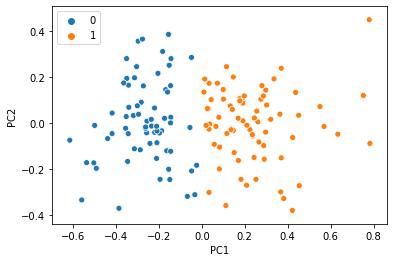

In [39]:
labels = KMeans(n_clusters = 2, random_state = 100).fit_predict(reduced_data)
sns.scatterplot(reduced_data.iloc[:,0], reduced_data.iloc[:,1], hue=labels)

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [41]:
## Considering the original dataset that was used in the beginning
## Comparing the reference mean given above with the mean of the data set
print("The reference mean values are shown below")
print("Reference Mean values")
print("---------------------")
print("Fresh:      12000.2977")
print("Milk:        5796.2")
print("Grocery:     3071.9")
print("---------------------")

The reference mean values are shown below
Reference Mean values
---------------------
Fresh:      12000.2977
Milk:        5796.2
Grocery:     3071.9
---------------------


In [42]:
##Adding a feature based on clusters
new_df = data.join(pd.DataFrame(labels,columns=['labels']),how='left')
new_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,labels
0,12669,9656,7561,214,2674,1338,1.0
1,7057,9810,9568,1762,3293,1776,1.0
2,6353,8808,7684,2405,3516,7844,0.0
3,13265,1196,4221,6404,507,1788,0.0
4,22615,5410,7198,3915,1777,5185,1.0


In [43]:
## Grouping the segments based on clusters and finding the mean and median for the same
newfeat = new_df.groupby('labels')['Fresh'].agg(['mean','median'])
newfeat1 = new_df.groupby('labels')['Milk'].agg(['mean','median'])
newfeat2 = new_df.groupby('labels')['Grocery'].agg(['mean','median'])
newfeat3 = new_df.groupby('labels')['Frozen'].agg(['mean','median'])
newfeat4 = new_df.groupby('labels')['Detergents_Paper'].agg(['mean','median'])
newfeat5 = new_df.groupby('labels')['Delicatessen'].agg(['mean','median'])

In [44]:
print("For Fresh",newfeat)
print("For Milk",newfeat1)
print("For Grocery",newfeat2)
print("--------------------------------------")
print("Comparing the mean values of the clustered segments above with the reference mean values")
print("The reference mean values are shown below")
print("Reference Mean values")
print("---------------------")
print("Fresh:      12000.2977")
print("Milk:        5796.2")
print("Grocery:     3071.9")
print("---------------------")

For Fresh                 mean  median
labels                      
0.0     13624.641791   11134
1.0     12948.273973    9434
For Milk                mean  median
labels                     
0.0     6509.253731    3327
1.0     7880.315068    4339
For Grocery                 mean  median
labels                      
0.0      9083.925373    5380
1.0     10096.575342    6996
--------------------------------------
Comparing the mean values of the clustered segments above with the reference mean values
The reference mean values are shown below
Reference Mean values
---------------------
Fresh:      12000.2977
Milk:        5796.2
Grocery:     3071.9
---------------------


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

## Conclusion

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.